In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

In [131]:
columns = ['Rational Quadratic', 'ExpSineSquared', 'Laplacian', 'RBF','Matern']
rows = ["RMSE", "MAE", "R²", "Adjusted R²", "Figure of Merit","Pearson Coefficient"]
fits = [
    "MCMC Averaging",        # for mcmc
    "Mean Param",            # for meanparams
    "Monte Carlo",           # for montecarlo
    "Peak Param",            # for peakparams
    "Point Estimates",       # for pointestimates
    "WhiteKernel No Error",  # for whitekernelnoerror
    "White Kernel Error",    # for whitekernelmeanerror
    "White Kernel min max"   # for whitekernelerrorminmax
]
mcmc = pd.read_csv("MCMCaveraged.csv", names=columns)
meanparams = pd.read_csv("meanparams.csv", names=columns)
montecarlo = pd.read_csv("MonteCarloSamplingMetrics.csv",names=columns)
peakparams = pd.read_csv("peakparams.csv",names=columns)
pointestimates = pd.read_csv("pointestimates.csv",names=columns)
whitekernelnoerror = pd.read_csv("WhiteKernelNoKnowledgeMetrics.csv",names=columns)
whitekernelmeanerror = pd.read_csv("WhiteKernelwitherrormean.csv",names=columns)
whitekernelerrorminmax = pd.read_csv("WhiteKernelwitherrorminmax.csv",names=columns)
metrics = [mcmc,meanparams,montecarlo,peakparams,pointestimates,whitekernelnoerror,whitekernelmeanerror,whitekernelerrorminmax]

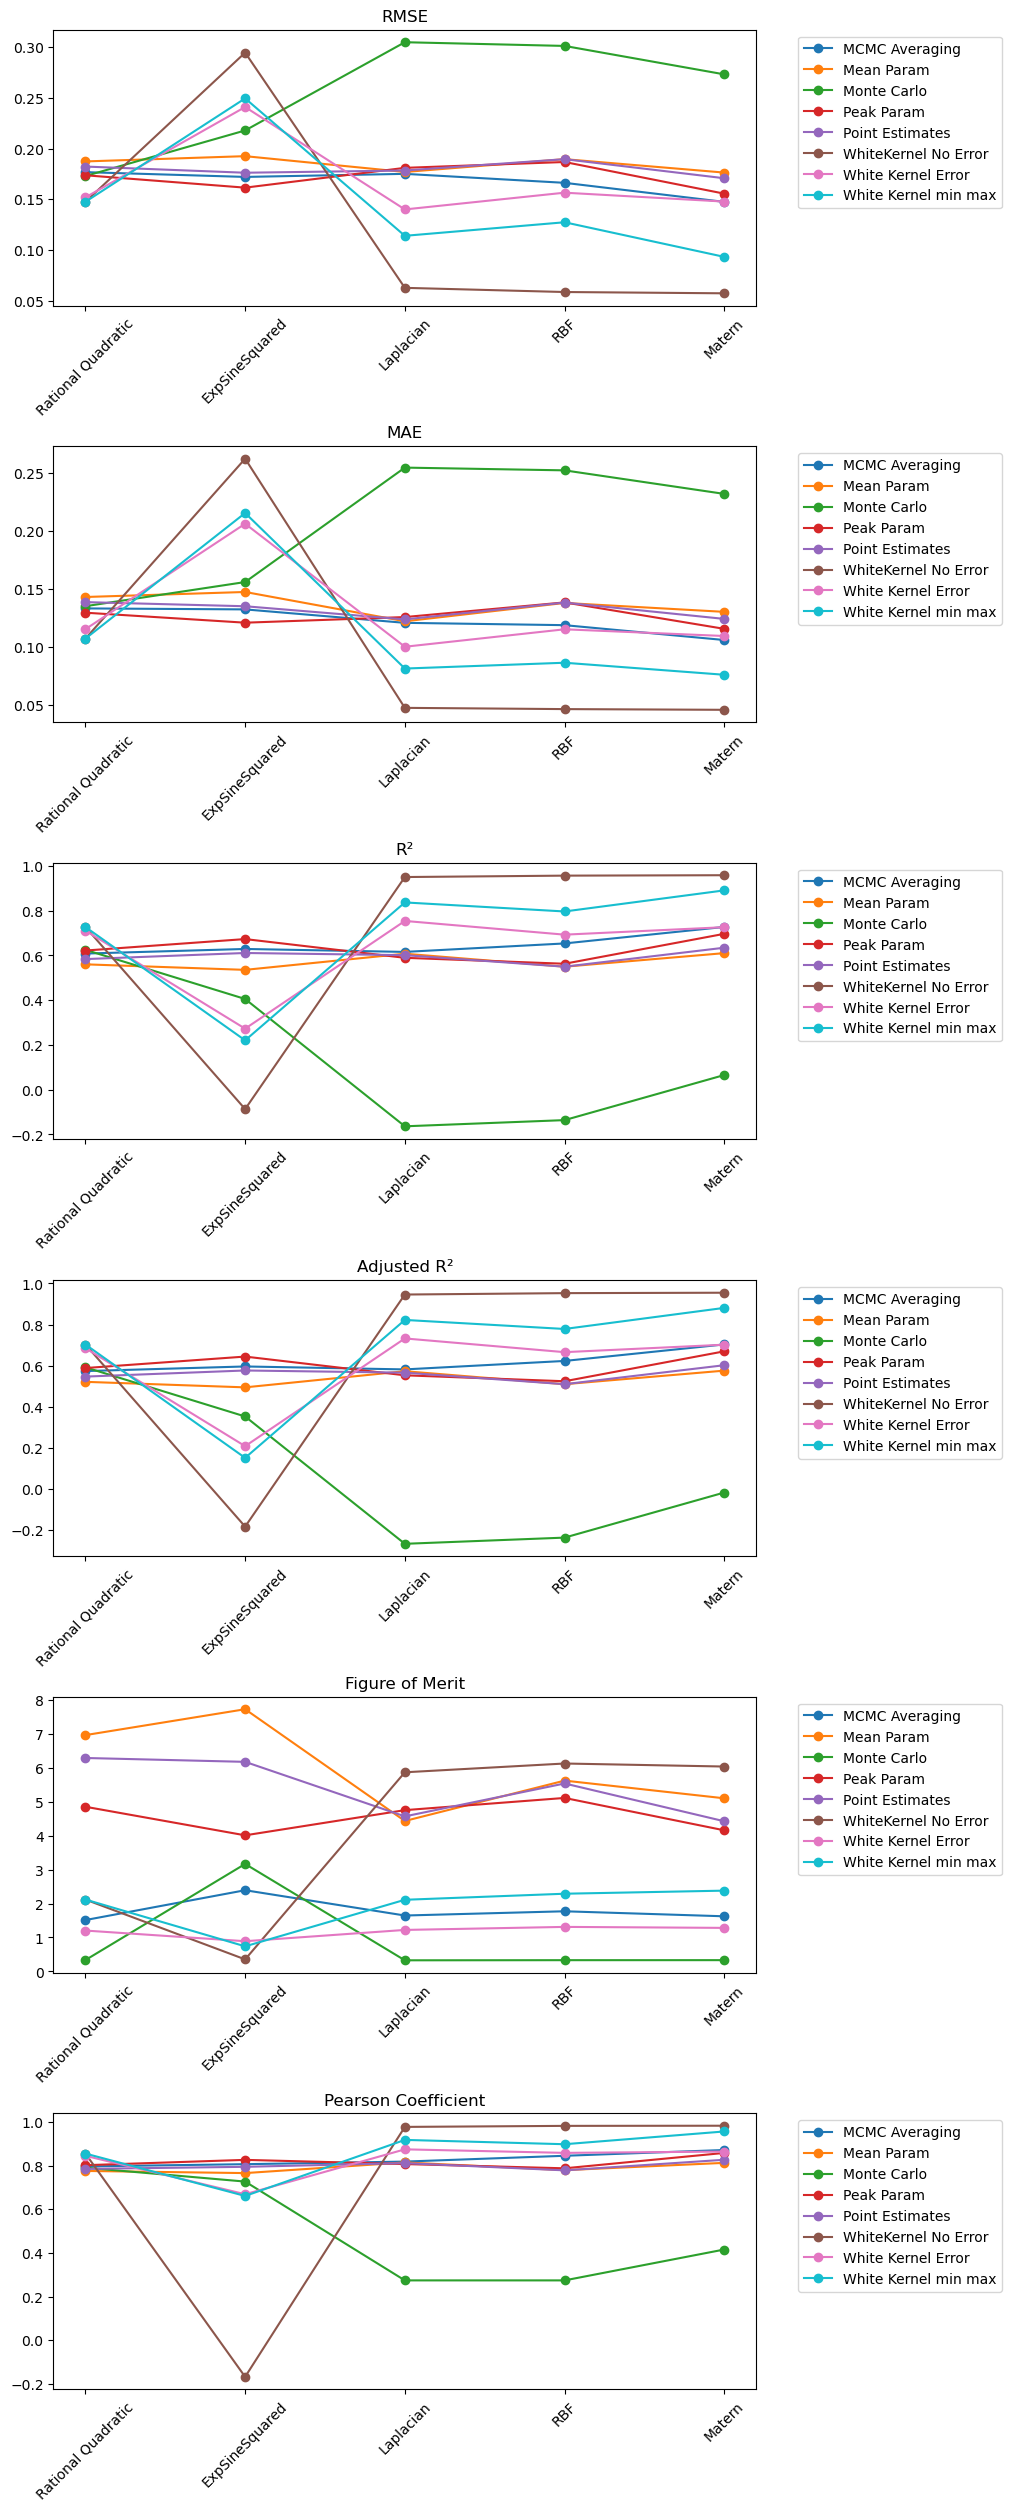

In [132]:
fig, axes = plt.subplots(nrows=len(rows), ncols=1, figsize=(10,25), constrained_layout=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf']
for i in range(len(rows)):
    x = range(len(columns))
    for j in range(len(metrics)):
        axes[i].plot(x, metrics[j].loc[i], '-o', label=fits[j], color=colors[j])
    x_ticks = np.arange(len(columns))
    axes[i].set_xticks(x_ticks, columns, rotation=45)
    axes[i].set_title(rows[i])
    axes[i].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

## Disqualify 
## Monte Carlo - very bad
## White Kernel no error over fits very bad figure of merit. There is one case with the Rational Quadratic Kernel that it performs quite well. This lines up exactly with the White Kernel min max case and so we can still remove it WLOG


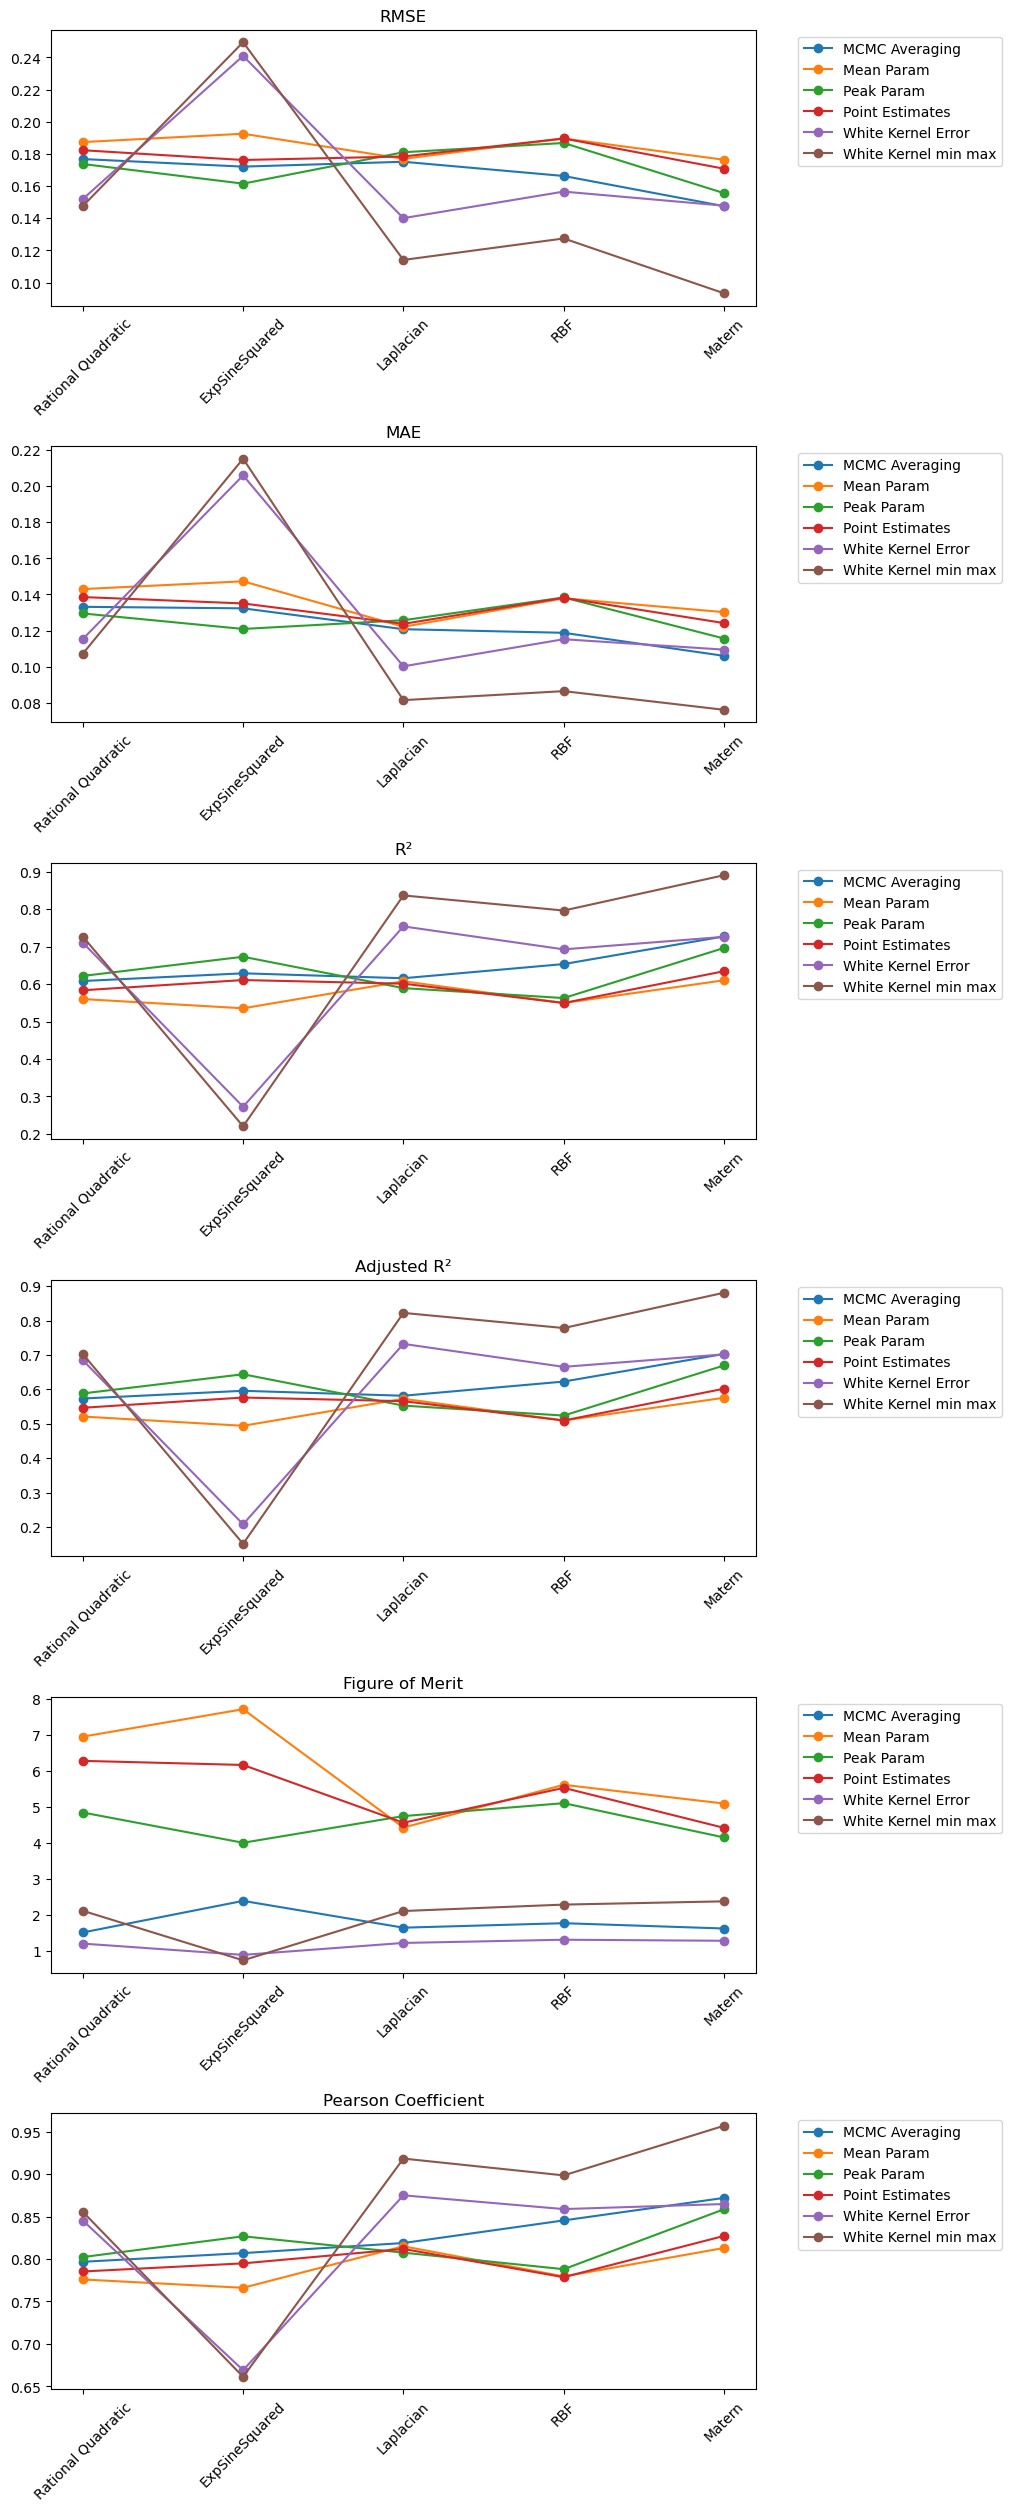

In [128]:
metrics = [mcmc,meanparams,peakparams,pointestimates,whitekernelmeanerror,whitekernelerrorminmax]
columns = ['Rational Quadratic', 'ExpSineSquared', 'Laplacian', 'RBF','Matern']
rows = ["RMSE", "MAE", "R²", "Adjusted R²", "Figure of Merit","Pearson Coefficient"]
fits = [
    "MCMC Averaging",        # for mcmc
    "Mean Param",            # for meanparams
    "Peak Param",            # for peakparams
    "Point Estimates",       # for pointestimates
    "White Kernel Error",    # for whitekernelmeanerror
    "White Kernel min max"   # for whitekernelerrorminmax
]
fig, axes = plt.subplots(nrows=len(rows), ncols=1, figsize=(10,25), constrained_layout=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf']
for i in range(len(rows)):
    x = range(len(columns))
    for j in range(len(metrics)):
        axes[i].plot(x, metrics[j].loc[i], '-o', label=fits[j], color=colors[j])
    x_ticks = np.arange(len(columns))
    axes[i].set_xticks(x_ticks, columns, rotation=45)
    axes[i].set_title(rows[i])
    axes[i].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

## Now we are left with a few common categories
#### 1 point estimates
Such as the mean, peak parameters and the pointwise parameters
Best of this lot is peak parameters.
#### 2 White Kernels
White kernel with error mean set as bounds and white kernel with error min and max set as bounds
Best of this lot is White Kernel with min and max error bounds
#### 3 MCMC Averaging


# So left with Peak parameter, White Kernel with min and max error bounds and MCMC averaged

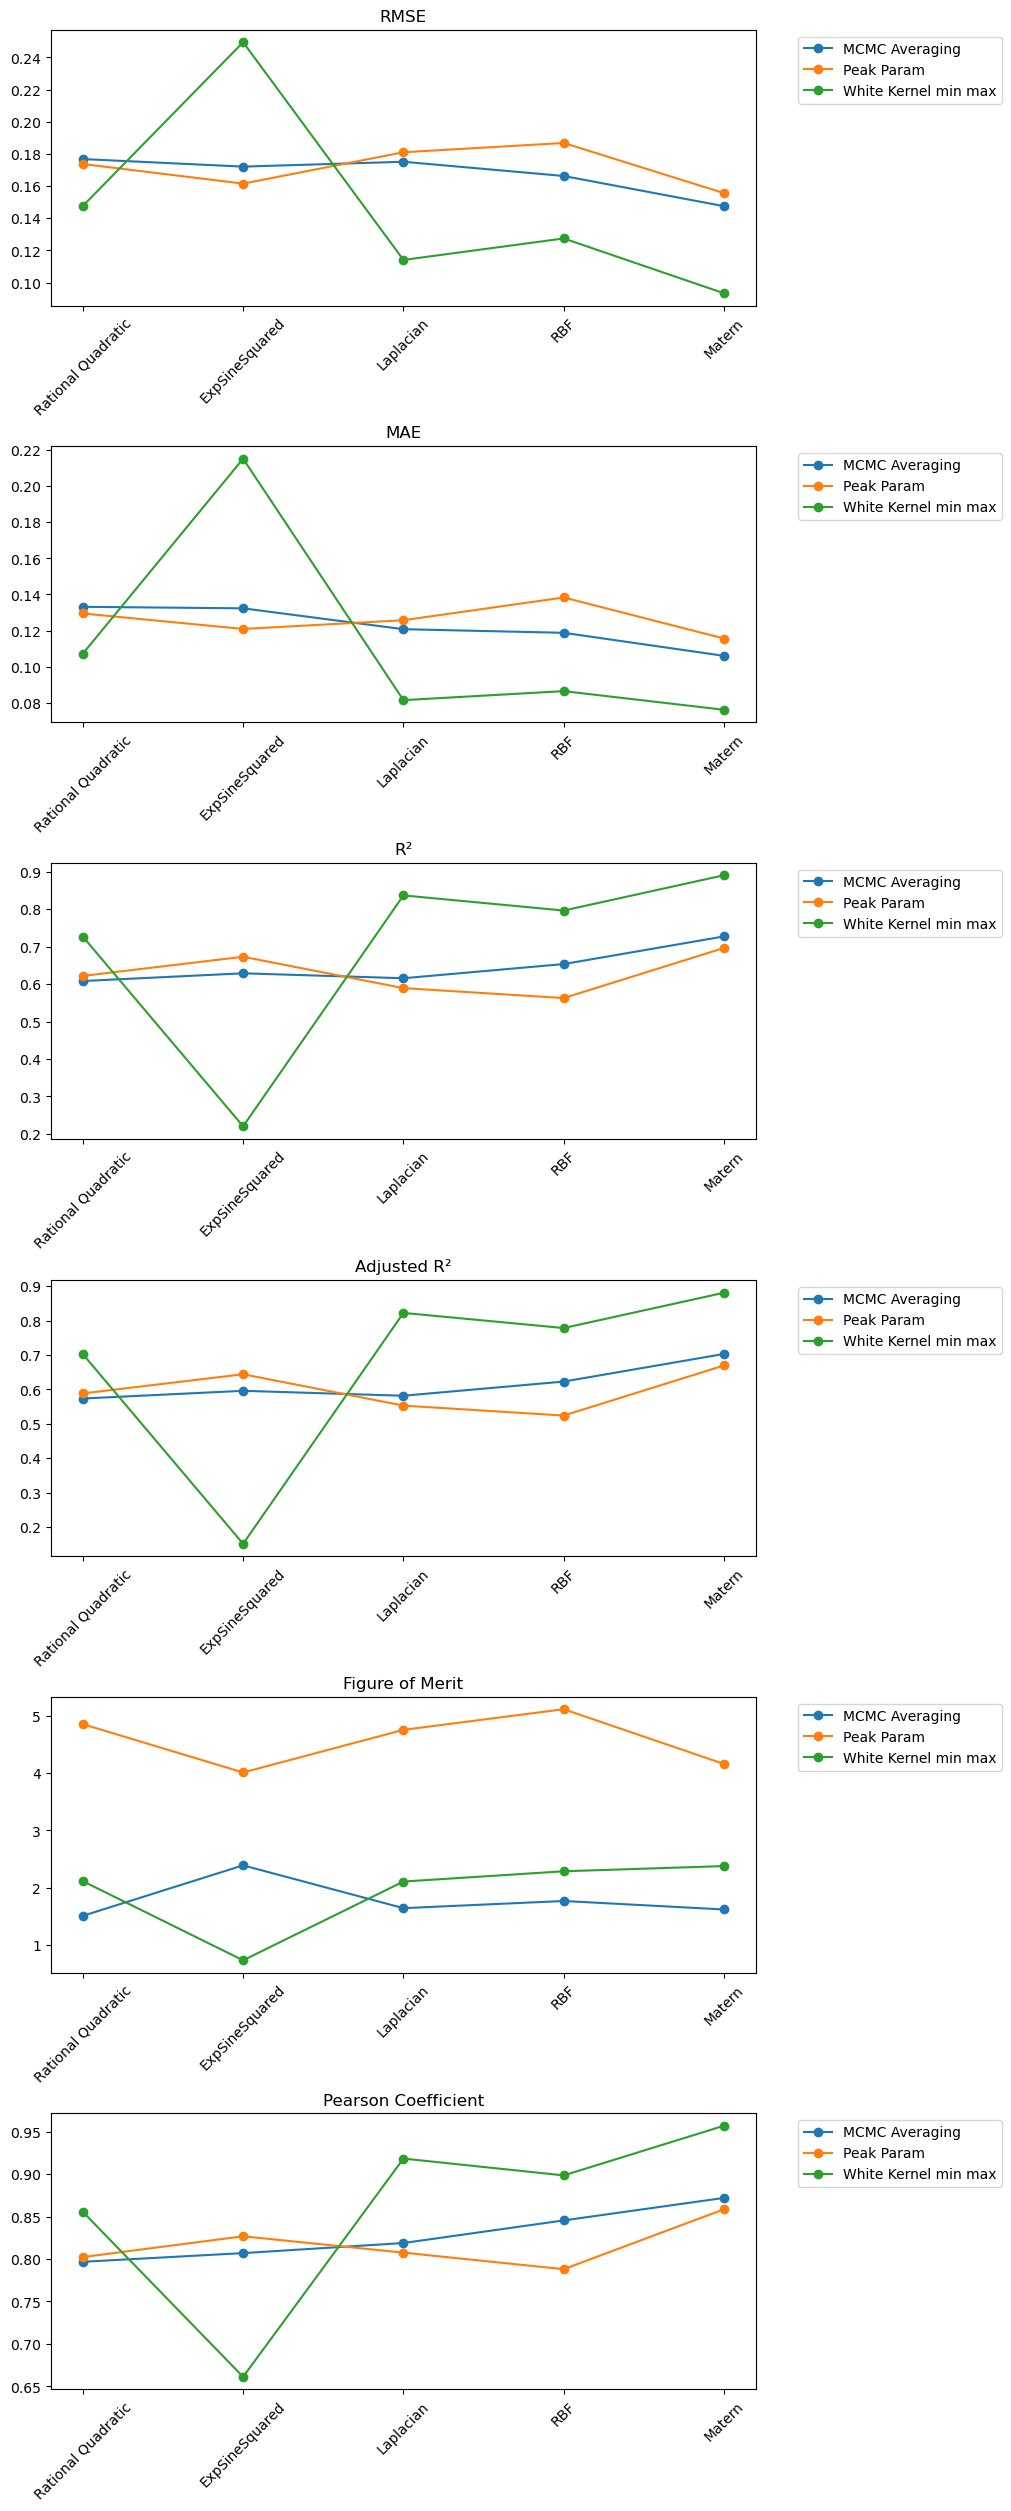

In [129]:
metrics = [mcmc,peakparams,whitekernelerrorminmax]
columns = ['Rational Quadratic', 'ExpSineSquared', 'Laplacian', 'RBF','Matern']
rows = ["RMSE", "MAE", "R²", "Adjusted R²", "Figure of Merit","Pearson Coefficient"]
fits = [
    "MCMC Averaging",        # for mcmc
    "Peak Param",            # for peakparams
    "White Kernel min max"   # for whitekernelerrorminmax
]
fig, axes = plt.subplots(nrows=len(rows), ncols=1, figsize=(10,25), constrained_layout=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf']
for i in range(len(rows)):
    x = range(len(columns))
    for j in range(len(metrics)):
        axes[i].plot(x, metrics[j].loc[i], '-o', label=fits[j], color=colors[j])
    x_ticks = np.arange(len(columns))
    axes[i].set_xticks(x_ticks, columns, rotation=45)
    axes[i].set_title(rows[i])
    axes[i].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

Now we remove MCMC averaging since it is too computationally expensive. This would be ideal but not realistic for us to compute for our purposes.
Our finalists are Peak parameters found after MCMC and White Kernel with noise bounds set as min error and max error
White Kernel with min and max error bounds out-performs peak parameters and so we choose this. It is also less computationally demanding as MCMC not required in each iteration.

Examining the White Kernel min max for different Kernels it performs relatively consistent apart from Exp Sine Squared, however the best performing kernel is the Matern slightly and so we choose the Matern Kernel with noise bounds set by the mininum and maximum error for our final model

# Just for Completeness the Final 2

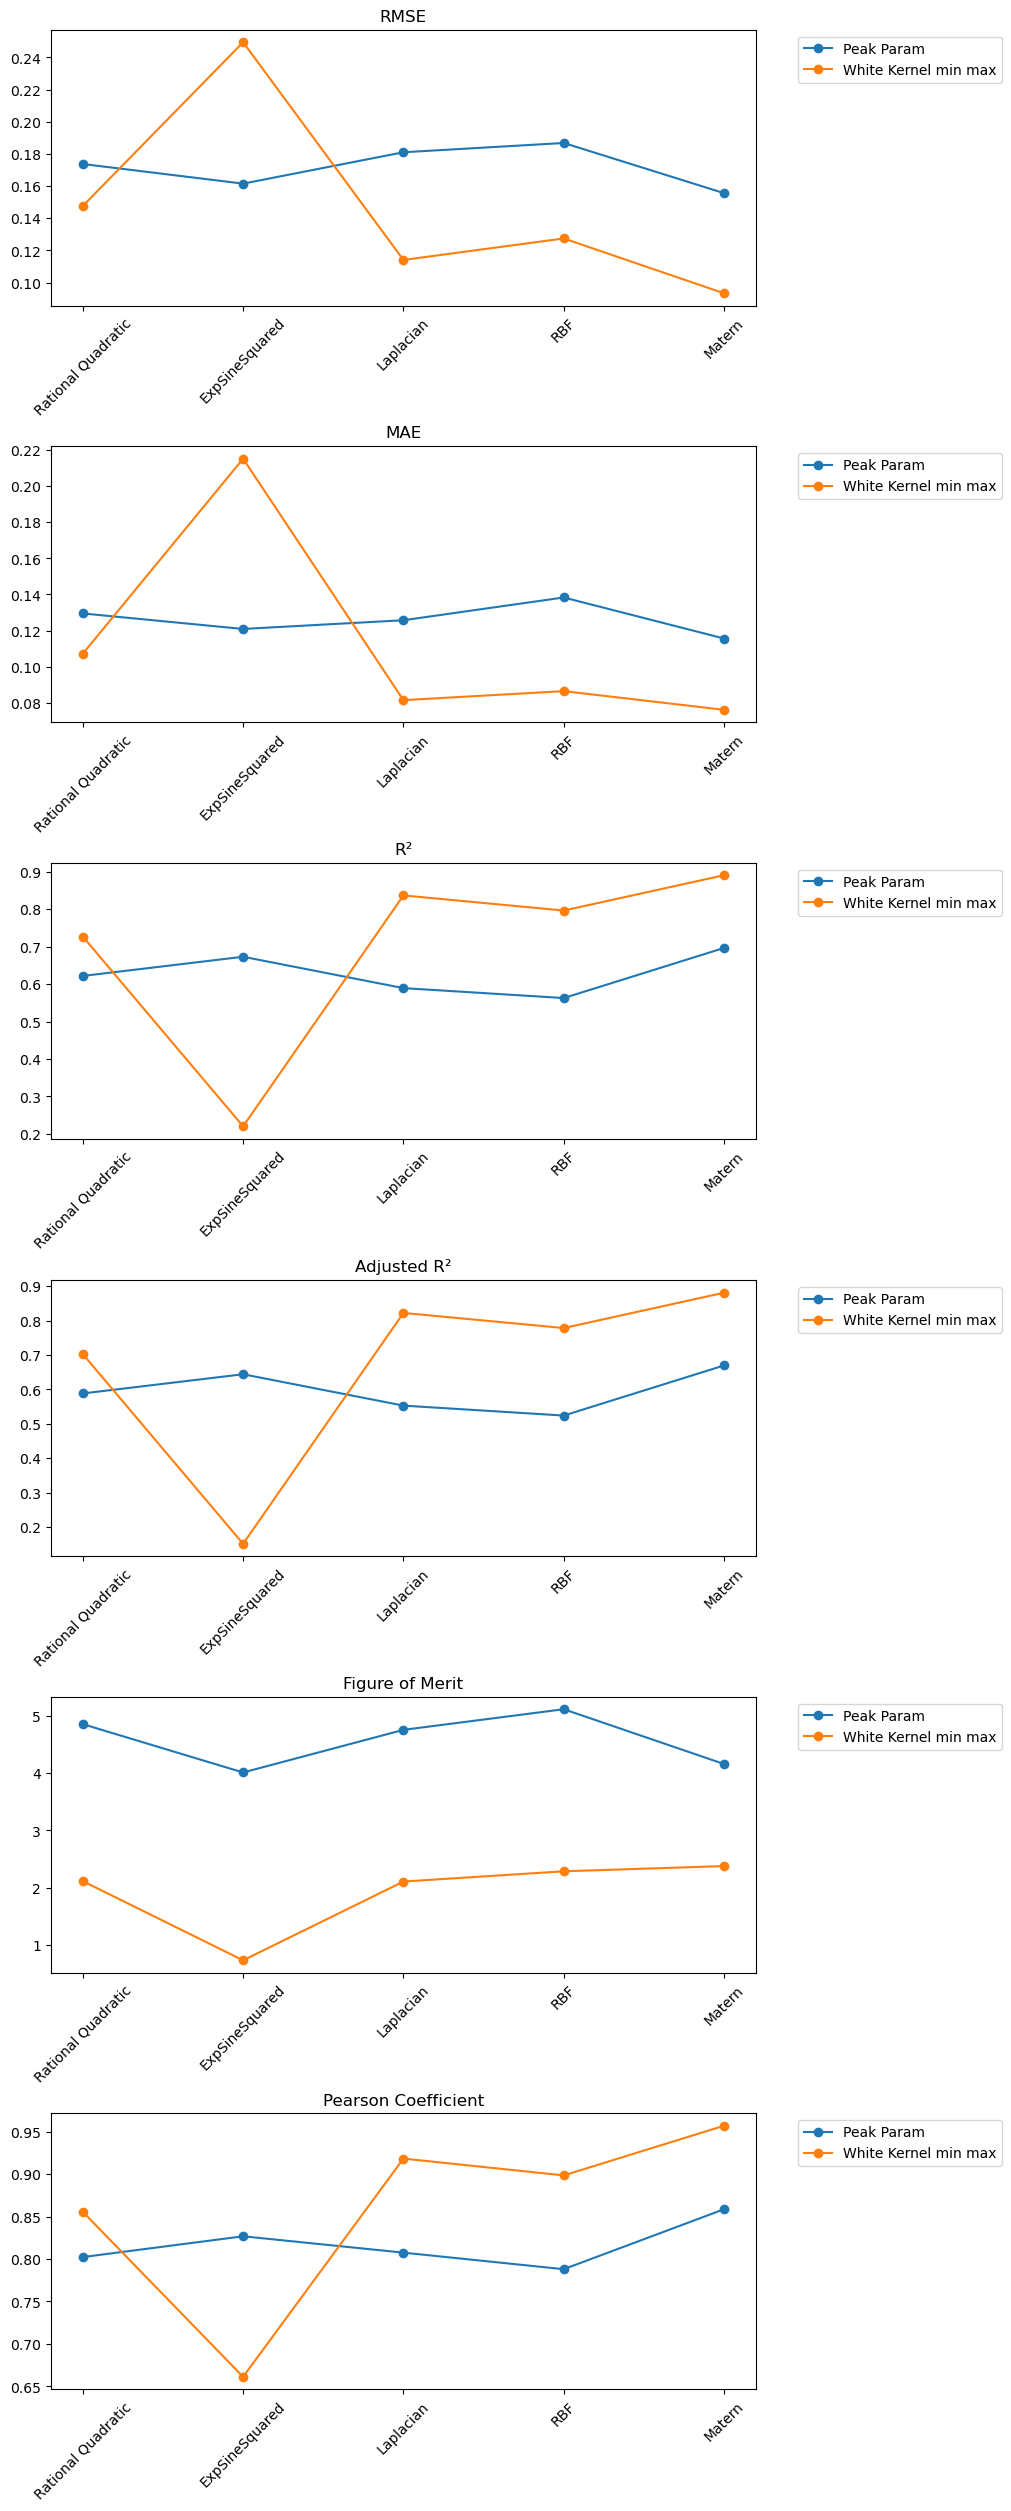

In [135]:
metrics = [peakparams,whitekernelerrorminmax]
columns = ['Rational Quadratic', 'ExpSineSquared', 'Laplacian', 'RBF','Matern']
rows = ["RMSE", "MAE", "R²", "Adjusted R²", "Figure of Merit","Pearson Coefficient"]
fits = ["Peak Param",            # for peakparams
        "White Kernel min max"   # for whitekernelerrorminma
        ]
fig, axes = plt.subplots(nrows=len(rows), ncols=1, figsize=(10,25), constrained_layout=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf']
for i in range(len(rows)):
    x = range(len(columns))
    for j in range(len(metrics)):
        axes[i].plot(x, metrics[j].loc[i], '-o', label=fits[j], color=colors[j])
    x_ticks = np.arange(len(columns))
    axes[i].set_xticks(x_ticks, columns, rotation=45)
    axes[i].set_title(rows[i])
    axes[i].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

The Matern of both